## Import Libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #normalize training examples
from sklearn.linear_model import Ridge  #linear regression model
from sklearn.model_selection import train_test_split #split dataset
from sklearn.model_selection import cross_val_score #for scoring model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedKFold  #for training and scoring
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error ##evaluate error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## Dataset Directories


In [239]:
#dataset filename for problem 1
filename1 = "ENB2012_data.xlsx"

#load dataset for bank records for problem 2
filename = 'bank_additional/bank-additional-full.csv'




# Problem 1

In [237]:

def problem1(filename):
    
    #read in the file as pandas dataframe
    dataset = pd.read_excel(filename)

    ## Seperate dataset into Input features and output labels

    X = dataset.iloc[:, 0:8] # input samples
    Y1 = dataset.iloc[:,8] #Y1 labels
    Y2 = dataset.iloc[:, 9] #Y2 labels

    
    #computes the mean and standard deviation to be used for normalization
    scaler = StandardScaler()

    #normalize the input samples
    X_normalize = scaler.fit_transform(X)
    
    #Splitting input samples and Y1 labels
    X_train, X_test, Y1_train, Y1_test = train_test_split(X , Y1 , test_size = 0.3, random_state = 42)

    #Splitting input samples and Y2 labels
    X_train, X_test, Y2_train, Y2_test = train_test_split(X , Y2 , test_size = 0.3, random_state = 42)
    
    
    # =============== TASK 1 =========================
    
    
    #steps for pipeline
    steps = [
        ('scalar', StandardScaler()),
        ('model', Ridge())  # <------ Whatever string you assign here will be used later
    ]
    
    #initialize pipeline
    pipeline  = Pipeline(steps = steps)

    # Since you have named it as 'model', you need change it to 'model_alpha'
    parameters = [ {'model__alpha': (0.001, 0.01, 0.1, 10) } ]
  
    #list of best alpha for Y1 and Y2
    best_alphas = []

    #initialize gridsearch with pipeline and parameters
    gridSearch = GridSearchCV(estimator = pipeline , param_grid = parameters, 
                          scoring = None, cv = None)

    #loop over the different output variables
    for Y_train in [Y1_train, Y2_train]:
        #train model
        gridSearch.fit(X_train, Y_train)
        #print('Best score: %0.3f : '  +  str(gridSearch.best_score_))
        #print('Best parameters set:' + str(gridSearch.best_params_))

        best_alpha = gridSearch.best_params_
        best_score = gridSearch.best_score_

        best_alphas.append(best_alpha)
    
    


    print("Best alpha parameter for Y1:  ", (list(best_alphas[0].values())))
    print("Best alpha parameter for Y2:  ",  list(best_alphas[1].values()))
    
    print('==============================*******************-==================\n')
    
    
    #scores to use for evaluation of model
    scorings = ['neg_mean_squared_error' , 'neg_mean_absolute_error']
    
    #get best alpha
    best_alpha = list(best_alphas[0].values())
    
    #initialize ridge regression model with best alpha
    ridge_model = Ridge(alpha = best_alpha[0])
    
    #initialize repeated kfold
    rkf  = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = None )

    #Evaluate Ridge Regression Model with different scores
    
    scores_dict = dict()
    
    Y_train = [Y1_train, Y2_train]

    ## For loop to compute and print mean and standard deviation for Y1 and Y1 using Ridge Regression with MAE and MSE
    for scoring in scorings:

        for i in range(len(Y_train)):

            score = cross_val_score(ridge_model , X_train, Y_train[i] , scoring = scoring, cv = rkf)
            
            print('MEAN and STANDARD DEVIATION FOR RIDGE REGRESSION \n')
            print('Mean ' + scoring + ' Y' + str(i+1) + '_Ridge Regression :' + str(np.mean(score)*-1))
            print('Standard Deviation_' + 'Y' + str(i+1) + '_Ridge_Regression :' + str(np.std(score)) + '\n')
            
    print('============*********************************======= \n')
    
    
    ### -----Mean and Standard Deviation of the scores for cross validations.-----


    
    ###================= End of Task 1 ===========================================
    
    
    # =============== TASK 2 Begins =========================

    
    ##### -- compute Best Parameters For Random Forest Regressor
    
    #steps for randomforest pipeline
    steps = [
        ('scalar', StandardScaler()),
        ('clf', RandomForestRegressor())  
    ]

    #initialize repeated kfold
    rkf  = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = None )
    
    #parameters for Random Forest Regressor
    ## parameters to be used by pipeline functions must start with the key name of the function defined in the pipeline object
    parameters = [{
    'clf__n_estimators' : (10, 50, 100 ,250, 500),
    'clf__max_depth': (50, 150, 250),
    'clf__min_samples_split': (2,3),
    'clf__min_samples_leaf' : (1,2,3),
    }]

    #initialize pipeline
    pipeline  = Pipeline(steps = steps)

    #list of best params for Y1 and y2 labels
    best_params = []

    gridSearch = GridSearchCV(estimator = pipeline , param_grid = parameters, n_jobs = -1 , verbose = 1,
                              scoring = None, cv = rkf)



    for i in range(len(Y_train)):
        
        gridSearch.fit(X_train, Y_train[i])
        
        print('BEST HYPERPARAMETER SCORE AND SET \n')
        print('Best score for Y' + str(i+1) + ' = ' + str(gridSearch.best_score_))
        print('Best parameters set:' + str(i+1) + ' = ' + str(gridSearch.best_params_) + '\n')
    
    print('============*********************************======= \n')

    ## ---- End of Best Parameter of Random Forest Regressor
    
    
    ##Optimal parameters for Random Forest Regressor

    n_estimators = gridSearch.best_params_['clf__n_estimators']
    min_samples_leaf = gridSearch.best_params_['clf__min_samples_leaf']
    min_samples_split = gridSearch.best_params_['clf__min_samples_split']
    max_depth = gridSearch.best_params_['clf__max_depth']
    #initialize repeated kfold

    rkf  = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = None )

    #n_estimators = 500
    #min_samples_leaf = 1
    #min_samples_split = 2
    #max_depth = 150


    model = RandomForestRegressor(n_estimators=n_estimators , min_samples_leaf = min_samples_leaf ,
                                  min_samples_split = min_samples_split, max_depth = max_depth)

    scorings = ['neg_mean_squared_error' , 'neg_mean_absolute_error']


    Y_train = [Y1_train, Y2_train]

    ## For loop to compute and print mean and standard deviation for Y1 and Y1 using Ridge Regression with MAE and MSE
    for scoring in scorings:

        for i in range(len(Y_train)):

            score = cross_val_score(model , X_train, Y_train[i] , scoring = scoring, cv = rkf)
            
            print('MEAN and STANDARD DEVIATION FOR RANDOMFOREST REGRESSOR \n')
            print('Mean ' + scoring + ' Y' + str(i+1) + '_RandomForest :' + str(np.mean(score)*-1))
            print('Standard Deviation_' + 'Y' + str(i+1) + '_RandomForest :' + str(np.std(score)) + '\n')

    print('=============****END OF PROBLEM 1****** =======================')
    

# Run Problem 1

In [238]:
problem1(filename1)

Best alpha parameter for Y1:   [0.1]
Best alpha parameter for Y2:   [0.1]
==============================*******************-==================

MEAN and STANDARD DEVIATION FOR RIDGE REGRESSION 

Mean neg_mean_squared_error Y1_Ridge Regression :8.875120194753686
Standard Deviation_Y1_Ridge_Regression :1.9467312100514547

MEAN and STANDARD DEVIATION FOR RIDGE REGRESSION 

Mean neg_mean_squared_error Y2_Ridge Regression :10.671657317086655
Standard Deviation_Y2_Ridge_Regression :3.0212245428156836

MEAN and STANDARD DEVIATION FOR RIDGE REGRESSION 

Mean neg_mean_absolute_error Y1_Ridge Regression :2.120951934179041
Standard Deviation_Y1_Ridge_Regression :0.27784822287962896

MEAN and STANDARD DEVIATION FOR RIDGE REGRESSION 

Mean neg_mean_absolute_error Y2_Ridge Regression :2.3081317021614907
Standard Deviation_Y2_Ridge_Regression :0.3164294235989567

============*********************************======= 

Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1356 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1970 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2884 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3842 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 6346 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 7848 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 19.5min finished


BEST HYPERPARAMETER SCORE AND SET 

Best score for Y1 = 0.9971294880475459
Best parameters set:1 = {'clf__max_depth': 250, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 500}

Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 830 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2006 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2920 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 3882 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4972 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 6278 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 7488 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 21.3min finished


BEST HYPERPARAMETER SCORE AND SET 

Best score for Y2 = 0.9643011064129157
Best parameters set:2 = {'clf__max_depth': 250, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 250}

============*********************************======= 

MEAN and STANDARD DEVIATION FOR RANDOMFOREST REGRESSOR 

Mean neg_mean_squared_error Y1_RandomForest :0.28625681187301294
Standard Deviation_Y1_RandomForest :0.1125439835052539

MEAN and STANDARD DEVIATION FOR RANDOMFOREST REGRESSOR 

Mean neg_mean_squared_error Y2_RandomForest :3.016851936060897
Standard Deviation_Y2_RandomForest :0.9258509064303088

MEAN and STANDARD DEVIATION FOR RANDOMFOREST REGRESSOR 

Mean neg_mean_absolute_error Y1_RandomForest :0.3472632916841398
Standard Deviation_Y1_RandomForest :0.060162236294311014

MEAN and STANDARD DEVIATION FOR RANDOMFOREST REGRESSOR 

Mean neg_mean_absolute_error Y2_RandomForest :1.0637059003494063
Standard Deviation_Y2_RandomForest :0.17999586127779793



# Problem 2

## Helper Functions For Problem 2

In [240]:
## ******Clean Dataset Function************
def data_cleaning(data):
    
    '''
    data : pandas Dataframe of training examples
    returns: cleaned_version of the dataset with categorical features replaced by numeric values
    '''
    
    dataset = data
    
    # list of column names of all categorical features
    cat_columns = dataset.select_dtypes(include = ['object']).columns 

    #convert to numeric data
    dataset[cat_columns] = dataset[cat_columns].astype('category').apply(lambda x:x.cat.codes)

    return dataset


## -******** Plot Graph Function *****************

def plot(x, y):
    
    # plotting the points  
    plt.plot(x, y, color = 'green' , marker = 'o') 

    # naming the x axis 
    plt.xlabel('C - Parameters') 
    plt.xscale('log')
    # naming the y axis 
    plt.ylabel('Mean AUC Score') 

    plt.grid(True)
    # giving a title to my graph 
    plt.title('Logistic Regression Model') 

    # function to show the plot 
    plt.show() 

    
    
## **********Logistic Regression Classifier Function **************

def logistic_regression(X , Y , C):
    '''
    X : input training split
    Y : output labels training split
    C : list of C-hyperparameters to be tested during training
    returns: dictionary of C-parameter as key and mean AUC as value
    '''
    scaler = StandardScaler()
    
    X_train = scaler.fit_transform(X)
    
    Y_train = Y
    #initialize repeated kfold
    rkf = RepeatedKFold(n_splits = 5 , n_repeats = 5)
    
    #list of C-hyperp
    C_list = C
    
    #list to hold mean scores
    scores = []
    #loop through all C values
    for c in C_list:
        
        #logistic regression classifier
        model = LogisticRegression(C = c, max_iter = 100)

        #training and scoring the model
        score = cross_val_score(model , X_train, Y_train , scoring = 'roc_auc', cv = rkf)

        #compute the average score for each C-parameter
        scores.append(np.mean(score))
        
    #c-parameter and corresponding mean AUC value
    
    c_auc_dict = dict(zip(C_list, scores))


    return c_auc_dict



## **************** RANDOM FOREST CLASSIFIER FUNCTION *********************
def random_forest(X , Y):
    '''
    X : input training split
    Y : output labels training split
    
    returns: gridSearch after fitting with X_train and Y_train
    '''
    #training input examples  
    X_train = X
    
    #training output labels
    Y_train = Y
    
    #randomforestclassifier object
    model = RandomForestClassifier()

    #repeatedKFold object
    rkf  = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state = None)

    steps = [
        ('scaler' , StandardScaler()),
        ('clf', model) 
    ]

    #create a pipeline object
    pipeline  = Pipeline(steps = steps)
    
    #parameters for Random Forest classifier
    ## parameters to be used by pipeline functions must start with the key name of the function defined in the pipeline object
    parameters = [{
        'clf__n_estimators' : (10, 50, 100 ,250, 500, 1000),
        'clf__max_depth': (50, 150, 250),
        'clf__min_samples_split': (2,3),
        'clf__min_samples_leaf' : (1,2,3),
        }]



    #initialize grid search object with pipeline, parameters and cross-validation
    gridSearch = GridSearchCV(estimator = pipeline , param_grid = parameters, n_jobs = -1 , verbose = 1,
                              scoring = 'roc_auc', cv = rkf)

    
    #train model and return best parameters
    gridSearch.fit(X_train, Y_train)
    
    return gridSearch
    

### ************ NEURAL NETWORK MODEL FUNCTION*******************
    
def neural_network(X, Y):
    
    '''
    X : input training split
    Y : output labels training split
    
    returns: gridSearch after fitting with X_train and Y_train
    '''
    
     #training input examples  
    X_train = X
    
    #training output labels
    Y_train = Y
    
    steps = [('scaler' , StandardScaler()) , ('clf' , MLPClassifier())]

    pipeline = Pipeline(steps = steps)

    rkf = RepeatedKFold(n_splits = 3 , n_repeats = 3)

    parameters = [{
                'clf__hidden_layer_sizes' : ((10,10,10), (10,10,10,10), (10,10,10,10,10), (10,10,10,10,10,10)),

                'clf__alpha' : (0.00001, 0.0001, 0.001, 0.01, 0.1)   
                }]

    #'clf__hidden_layers_sizes' : ((10,10,10), (10,10,10,10), (10,10,10,10,10), (10,10,10,10,10,10))

    gridSearch = GridSearchCV(pipeline, param_grid = parameters , scoring = 'roc_auc' , n_jobs = -1, cv = rkf, verbose = 1)

    #fitting training data
    gridSearch.fit(X_train, Y_train)
    
    return gridSearch


    


## Problem 2 Main Function

In [241]:
def problem2(filename):
    
    data = pd.read_csv(filename , sep = ';' , index_col = False)

    #data.head()
    #statistical information


    #data.describe()

    ##convert categorical features to numeric

    #replace categorical features with numeric features
    dataset = data_cleaning(data)

    #dataset.head()
    #Extract the imput and 
    X = dataset.iloc[:, 0:-1]
    Y  = dataset.iloc[: , -1]

    #split dataset to train and test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.3)
    #dataset.head()

    
    ##=======   TASK 1: LOGISTIC REGRESSION ============================
    
    #c-hyperparameters for training logistic regression model
    C_params = np.array([0.0001,0.0005,0.001,0.005, 0.01, 0.05 ,0.1, 0.5, 1.0, 5, 10.0, 50, 100.0, 250, 500, 1000.0, 2500, 5000, 7500, 10000.0])

    #get dictionary of c-parameter and mean auc of logistic regression model
    c_mean_auc_dict = logistic_regression( X_train, Y_train , C_params)

    best_c = max( c_mean_auc_dict, key=lambda key:  c_mean_auc_dict[key])

    print('C parameter with the Highest AUC score : ' + str(best_c) )
    print('\n')

    ## plot graph of mean AUC scores with C-parameters
    plot(list(c_mean_auc_dict.keys()) , list(c_mean_auc_dict.values()))

      
    ##=======   TASK 2: RANDOM FOREST MODEL ============================

    #train randomforest model using gridsearch return the trained gridsearch
    gridSearch_RandomForest = random_forest(X_train, Y_train)
   
    print('===== Random Forest Training Results =======')
    print('Best Score For RandomForest Classifier :' + str(gridSearch_RandomForest.best_score_))
    print('Best Parameters set:' + str(gridSearch_RandomForest.best_params_))
    print('\n')

    
    ##=======   TASK 3: NEURAL NETWORK MODEL ============================

    #train neural network using gridsearch and different parameters.
    gridSearch_NeuralNetwork = neural_network(X_train, Y_train)
    
    
    print('===== Neural Network Training Results =======')
    print('Best Score For Neural Network :' + str(gridSearch_NeuralNetwork.best_score_))
    print('Best Parameters set:' + str(gridSearch_NeuralNetwork.best_params_))
    print('\n')

    
    ##=======   TASK 4 ============================
    
    scaler = StandardScaler()
    
    X_norm = scaler.fit_transform(X)
    
    #initialize 5 fold cross validation with randomly split data
    kf = KFold(n_splits = 5 , shuffle = True)
    
    #initialize logistic regression classifier
    logistic_model = LogisticRegression() #default C value is 1
    
    #average prediction with logistic model using 5-fold CV
    lr_predict = cross_val_predict(logistic_model, X_norm, Y, cv = kf )
    
    #classification report
    print('Classification Report For Logistic Regression')
    print(classification_report(Y, lr_predict))
    print('\n')
    
    #******Prediction with Random Forest Classifier *****
    
    #best parameters for random forest classifier
    best_params_RF = gridSearch_RandomForest.best_params_

    n_estimators = best_params_RF['clf__n_estimators']
    min_samples_leaf = best_params_RF['clf__min_samples_leaf']
    min_samples_split = best_params_RF['clf__min_samples_split']
    max_depth  = best_params_RF['clf__max_depth']
    
    ##initialize classifier object
    randomForest_model = RandomForestClassifier(n_estimators = n_estimators , max_depth =  max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
    
    ##predict output with random forest model using 5 fold cv
    rf_predict = cross_val_predict(randomForest_model , X_norm, Y, cv = kf)
    
    print('Classification Report For Random Forest')
    print(classification_report(Y, rf_predict))
    print('\n')
    
    
    # ******* Prediction with Neural Network Model ********
    
    best_params_NN = gridSearch_NeuralNetwork.best_params_
    
    alpha = best_params_NN['clf__alpha']
    hidden_layer_sizes = best_params_NN['clf__hidden_layer_sizes']
    
    nn_model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes , alpha = alpha)
    
    ##predict output with random forest model using 5 fold cv
    nn_predict = cross_val_predict(nn_model , X_norm, Y, cv = kf)
    
    print('Classification Report For Neural Network')
    print(classification_report(Y, nn_predict))
    print('\n')
    
    
    
    

## Run Problem 2

C parameter with the Highest AUC score : 1000.0




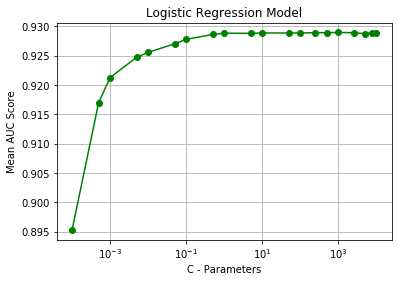

Fitting 9 folds for each of 108 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 35.2min finished


===== Random Forest Training Results =======
Best Score For RandomForest Classifier :0.9471735876342859
Best Parameters set:{'clf__max_depth': 150, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2, 'clf__n_estimators': 1000}


Fitting 9 folds for each of 20 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 17.5min finished


===== Neural Network Training Results =======
Best Score For Neural Network :0.9400006888807617
Best Parameters set:{'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (10, 10, 10)}


Classification Report For Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36548
           1       0.67      0.41      0.51      4640

    accuracy                           0.91     41188
   macro avg       0.80      0.69      0.73     41188
weighted avg       0.90      0.91      0.90     41188



Classification Report For Random Forest
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     36548
           1       0.66      0.51      0.58      4640

    accuracy                           0.92     41188
   macro avg       0.80      0.74      0.76     41188
weighted avg       0.91      0.92      0.91     41188



Classification Report For Neural Network
              precision    recall  f

In [242]:
problem2(filename)